# Correlation of personality traits

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Character Types - Tabellenblatt1.csv')
df.head()

,Alias,Extraverted,Introverted (i guess you have to double check what percentage it's giving you?),Intuative,Observant,Thinking,Feeling,Judging,Prospecting,Assertive,Turbulent,Personality Type,How many sibilings?,How many pets did you have (so far),How often do you cook in a week,How many cigarettes do you smoke in a week,Hours spent on social media per day,Hours of sleep per day,How many cups of coffee/tea do you drink daily?
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eleanor,49.0,51.0,61.0,39.0,54.0,46.0,90.0,10.0,54.0,46.0,Architect,2.0,3.0,17.0,0.0,1.5,7.0,5.0
2,Ellaine,60.0,40.0,73.0,NaN,37.0,63.0,54.0,NaN,19.0,81.0,Protagonist,3.0,0.0,7.0,0.0,1.5,7.0,1.0
3,Wanja,28.0,72.0,60.0,NaN,25.0,75.0,64.0,NaN,10.0,90.0,Advocate,5.0,0.0,5.0,0.0,1.0,7.0,2.0
4,Ghaith,56.0,44.0,52.0,NaN,43.0,57.0,26.0,74.0,18.0,82.0,Campaigner,4.0,0.0,7.0,0.0,1.0,6.0,1.0


In [7]:
df.columns

Index(['Alias', 'Extraverted',
       'Introverted (i guess you have to double check what percentage it's giving you?)',
       'Intuative ', 'Observant', 'Thinking', 'Feeling', 'Judging',
       'Prospecting', 'Assertive', 'Turbulent', 'Personality Type',
       'How many sibilings?', 'How many pets did you have (so far)',
       'How often do you cook in a week',
       'How many cigarettes do you smoke in a week',
       'Hours spent on social media per day', 'Hours of sleep per day',
       'How many cups of coffee/tea do you drink daily?'],
      dtype='object')

In [12]:
df_small = df.loc[:, ['Extraverted', 'Intuative ', 'Thinking', 'Judging', 'Assertive', 'How many sibilings?', 'How many pets did you have (so far)',
       'How often do you cook in a week',
       'How many cigarettes do you smoke in a week',
       'Hours spent on social media per day', 'Hours of sleep per day',
       'How many cups of coffee/tea do you drink daily?']]

In [13]:
df_traits = df.loc[:, ['Extraverted', 'Intuative ', 'Thinking', 'Judging', 'Assertive']]

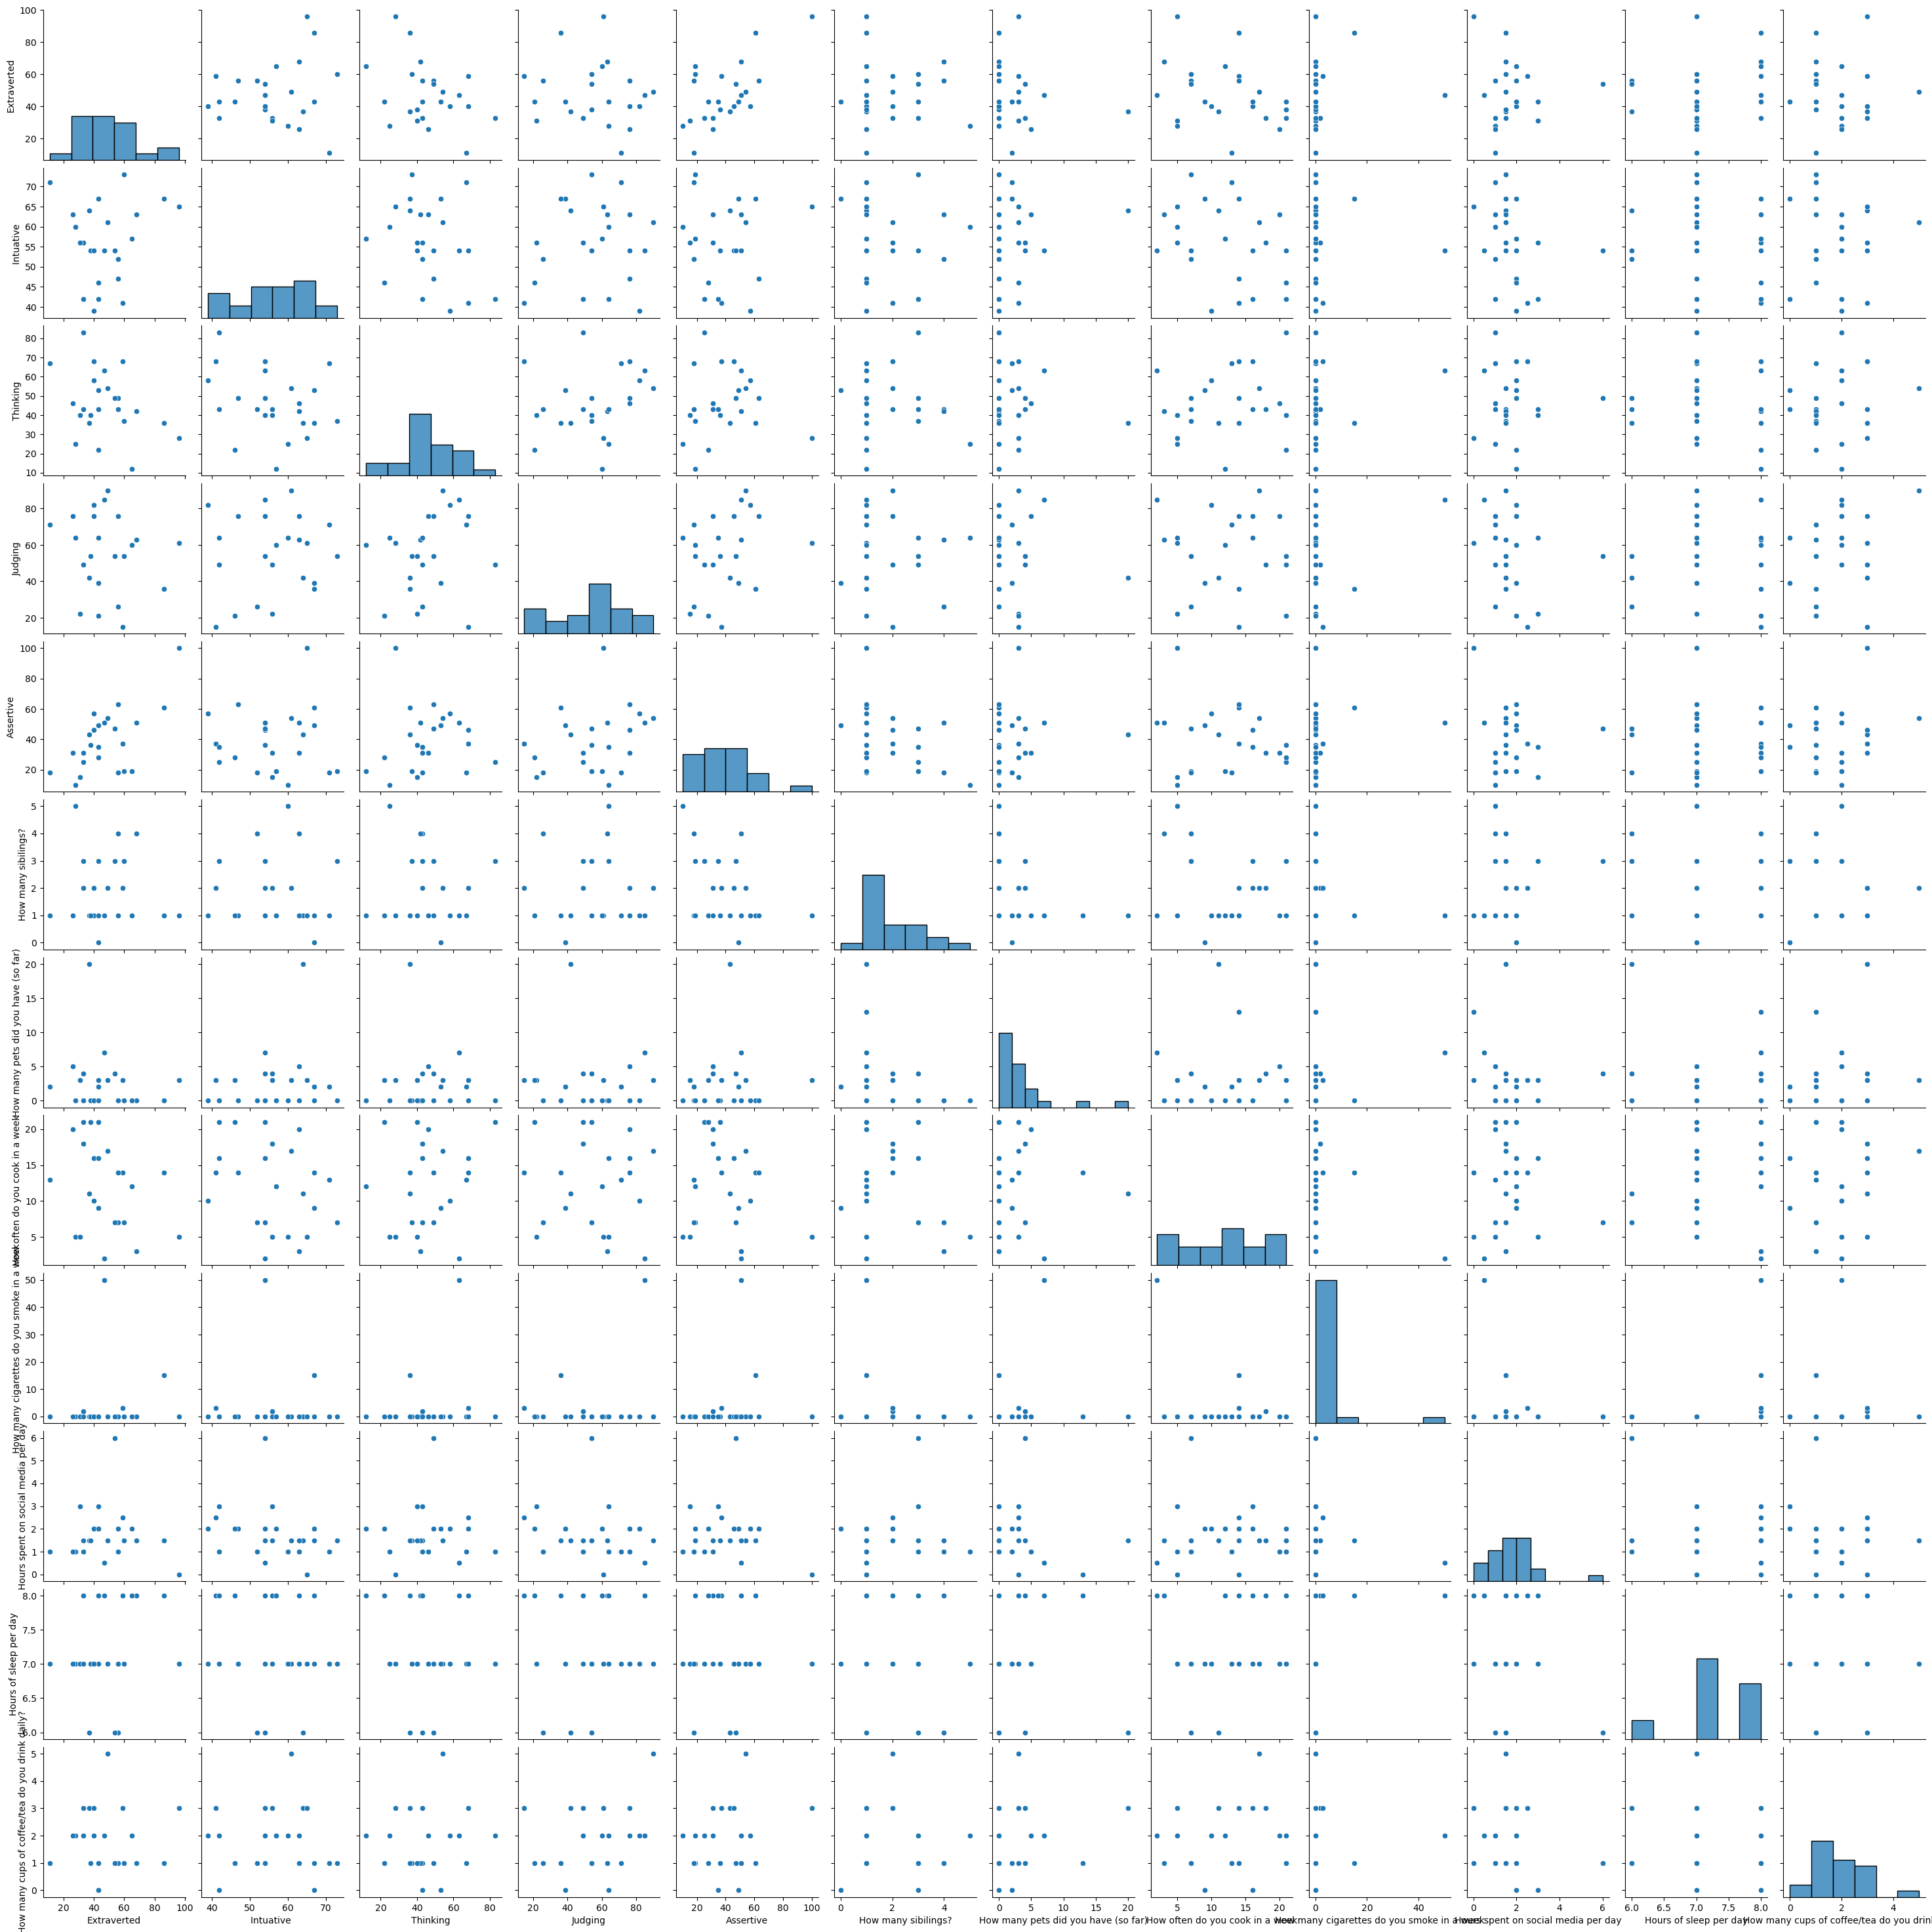

In [10]:
sns.pairplot(df_small)

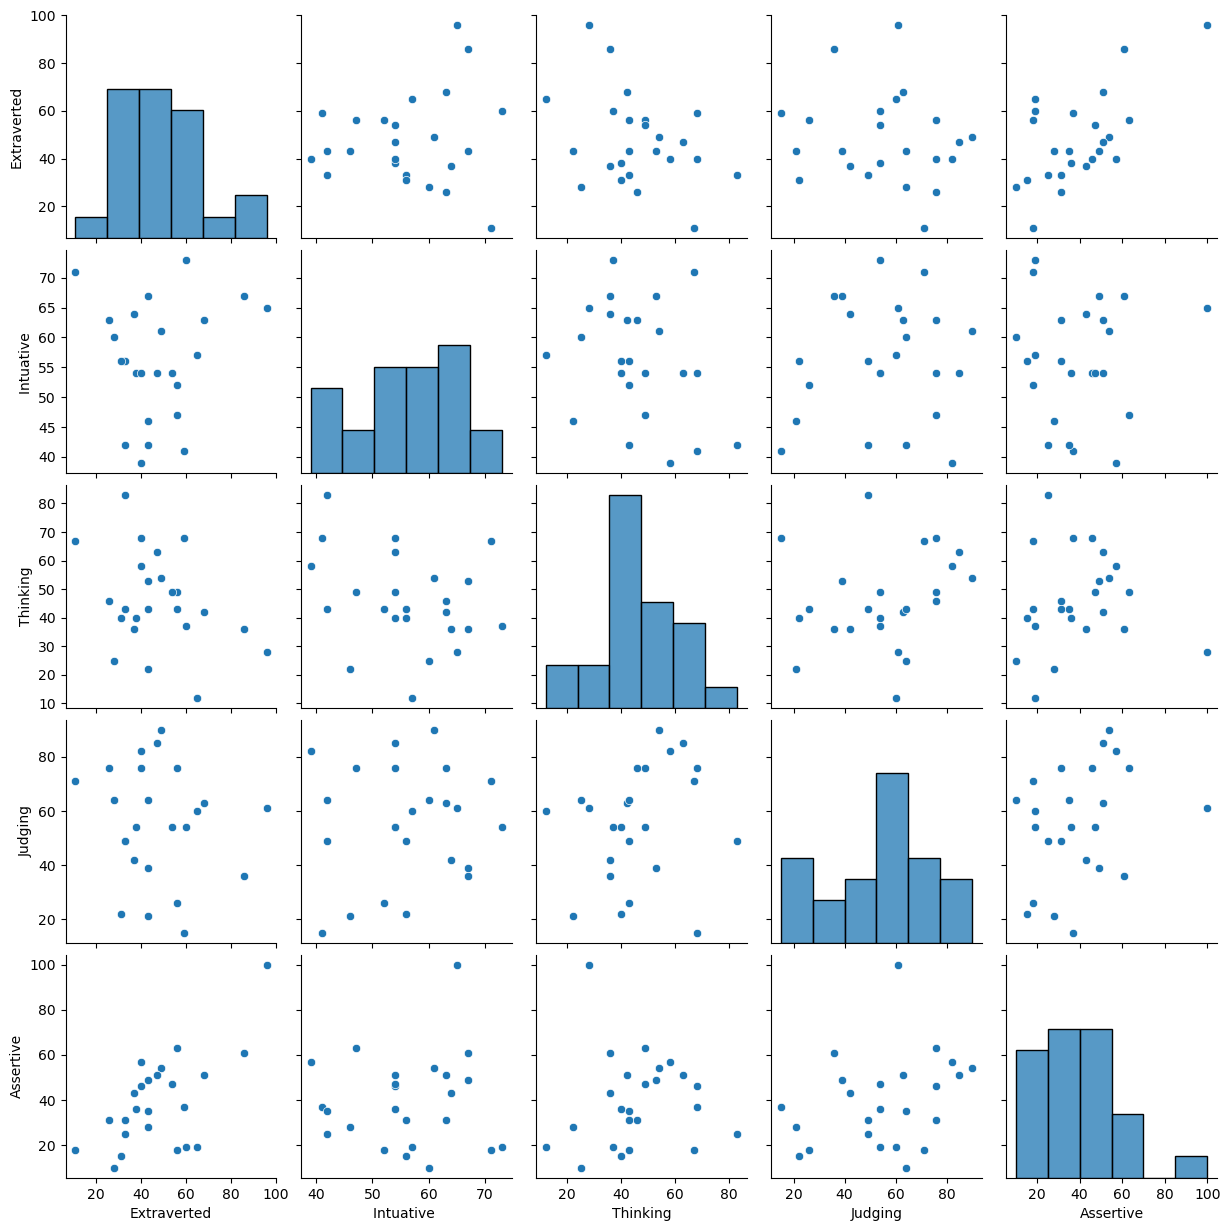

In [14]:
sns.pairplot(df_traits)

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

# Placeholder for results
corr_results = []

# Perform pairwise Spearman correlation
columns = df_traits.columns
for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i < j:  # Avoid redundant calculations
            corr, p_value = spearmanr(df_traits[col1], df_traits[col2], nan_policy='omit')
            corr_results.append((col1, col2, corr, p_value))

# Convert to DataFrame for better readability
corr_df = pd.DataFrame(corr_results, columns=["Variable 1", "Variable 2", "Spearman Corr", "P-Value"])

# Bonferroni correction
bonferroni_corrected = multipletests(corr_df["P-Value"], method="bonferroni")
corr_df["Bonferroni Corrected P-Value"] = bonferroni_corrected[1]

# Results without Bonferroni
print("Spearman Correlation Results (Without Correction):")
print(corr_df[["Variable 1", "Variable 2", "Spearman Corr", "P-Value"]])

# Results with Bonferroni Correction
print("\nSpearman Correlation Results (With Bonferroni Correction):")
print(corr_df[["Variable 1", "Variable 2", "Spearman Corr", "Bonferroni Corrected P-Value"]])

Spearman Correlation Results (Without Correction):
    Variable 1  Variable 2  Spearman Corr   P-Value
0  Extraverted  Intuative        0.073160  0.734058
1  Extraverted    Thinking      -0.241658  0.255272
2  Extraverted     Judging      -0.118700  0.580659
3  Extraverted   Assertive       0.507736  0.011315
4   Intuative     Thinking      -0.348406  0.095224
5   Intuative      Judging       0.029939  0.889552
6   Intuative    Assertive      -0.009166  0.966093
7     Thinking     Judging       0.313837  0.135324
8     Thinking   Assertive       0.197036  0.356093
9      Judging   Assertive       0.332534  0.112359

Spearman Correlation Results (With Bonferroni Correction):
    Variable 1  Variable 2  Spearman Corr  Bonferroni Corrected P-Value
0  Extraverted  Intuative        0.073160                      1.000000
1  Extraverted    Thinking      -0.241658                      1.000000
2  Extraverted     Judging      -0.118700                      1.000000
3  Extraverted   Assertive   

you can use Pearson because it is rather normally distributed